# Import packages and setup data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import *
import datetime as dt

In [2]:
# load data
df = pd.read_csv('EDA_data.csv')

In [3]:
# data preview
print(df.shape)
df.head()

(129487, 24)


,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
# basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
Unnamed: 0                           129487 non-null int64
satisfaction                         129487 non-null int64
Gender                               129487 non-null int64
Customer_Type                        129487 non-null object
Age                                  129487 non-null int64
Type_of_Travel                       129487 non-null object
Class                                129487 non-null object
Flight_Distance                      129487 non-null int64
Seat_comfort                         129487 non-null int64
Departure_Arrival_time_convenient    129487 non-null int64
Food_and_drink                       129487 non-null int64
Gate_location                        129487 non-null int64
Inflight_wifi_service                129487 non-null int64
Inflight_entertainment               129487 non-null int64
Online_support                       129487 non-null int64
E

In [5]:
df.head()

,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
# assign numerical map to categorical data
for col in df.select_dtypes(include='O').columns:
    l=LabelEncoder()
    df[f'{col}_num']=l.fit_transform(df[col])

In [7]:
df.head()

,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,...,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Customer_Type_num,Type_of_Travel_num,Class_num
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,0,3,5,3,2,0,0.0,0,1,1
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,4,4,2,3,2,310,305.0,0,1,0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,3,4,4,4,2,0,0.0,0,1,1
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,0,1,4,1,3,0,0.0,0,1,1
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,0,2,4,2,5,0,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 27 columns):
Unnamed: 0                           129487 non-null int64
satisfaction                         129487 non-null int64
Gender                               129487 non-null int64
Customer_Type                        129487 non-null object
Age                                  129487 non-null int64
Type_of_Travel                       129487 non-null object
Class                                129487 non-null object
Flight_Distance                      129487 non-null int64
Seat_comfort                         129487 non-null int64
Departure_Arrival_time_convenient    129487 non-null int64
Food_and_drink                       129487 non-null int64
Gate_location                        129487 non-null int64
Inflight_wifi_service                129487 non-null int64
Inflight_entertainment               129487 non-null int64
Online_support                       129487 non-null int64
E

In [9]:
# quick note: Eco class is 1, business is 0, and eco+ is 2
# 0 is loyal customer and 1 is disloyal
# 1 is personal travel and 0 is work I guess

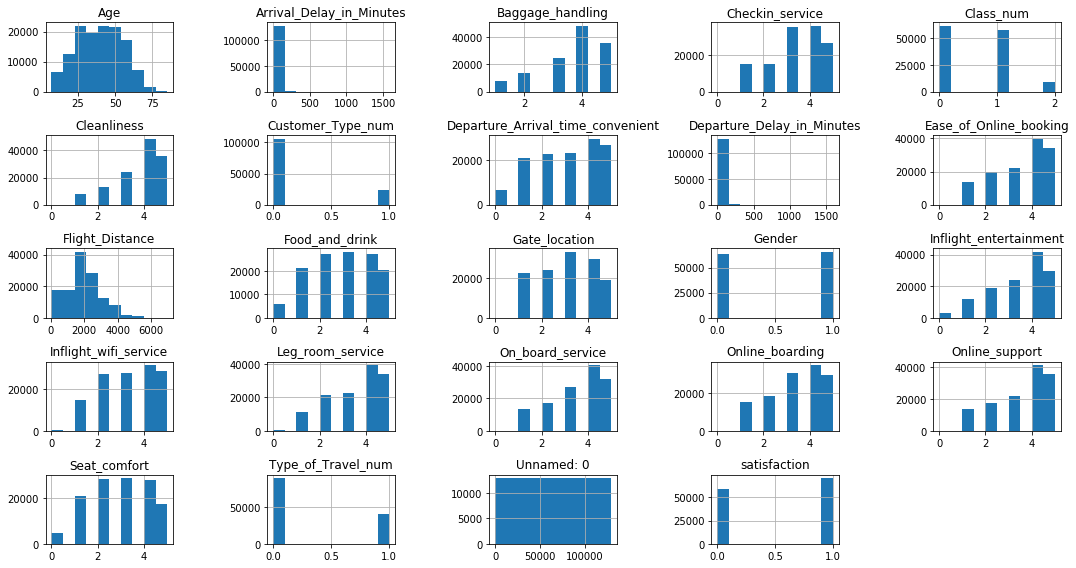

In [10]:
# histograms to look for binning opportunities

df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
pd.qcut(df.Age,q=3).value_counts()

(6.999, 32.0]    44673
(32.0, 47.0]     43083
(47.0, 85.0]     41731
Name: Age, dtype: int64

In [13]:
df['Age_bin'] = pd.qcut(df.Age,q=3,labels=[1,2,3])

In [14]:
df.head()

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Customer_Type_num,Type_of_Travel_num,Class_num,Age_bin
0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,5,3,2,0,0.0,0,1,1,3
1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,2,3,2,310,305.0,0,1,0,2
2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,4,4,4,2,0,0.0,0,1,1,1
3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,4,1,3,0,0.0,0,1,1,3
4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,4,2,5,0,0.0,0,1,1,3


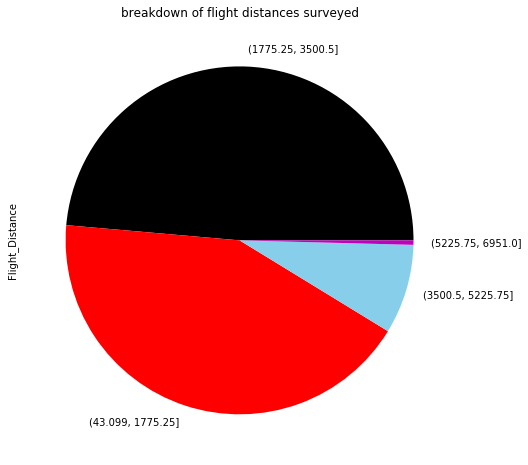

In [15]:
pd.cut(df.Flight_Distance,bins=4).value_counts().plot(kind='pie',figsize=(15,8),colors=['k','r','skyblue','m','green','grey'])
plt.title('breakdown of flight distances surveyed')
plt.show()

In [16]:
pd.cut(df.Flight_Distance,bins=3).value_counts()

(43.099, 2350.333]      88941
(2350.333, 4650.667]    38879
(4650.667, 6951.0]       1667
Name: Flight_Distance, dtype: int64

In [17]:
df['distance_bin']=pd.cut(df.Flight_Distance,bins=3,labels=[0,1,2])

In [18]:
df['total_delay']=df.Arrival_Delay_in_Minutes+df.Departure_Delay_in_Minutes

In [19]:
x=stats.norm.rvs(loc=40,scale=5,size=100)

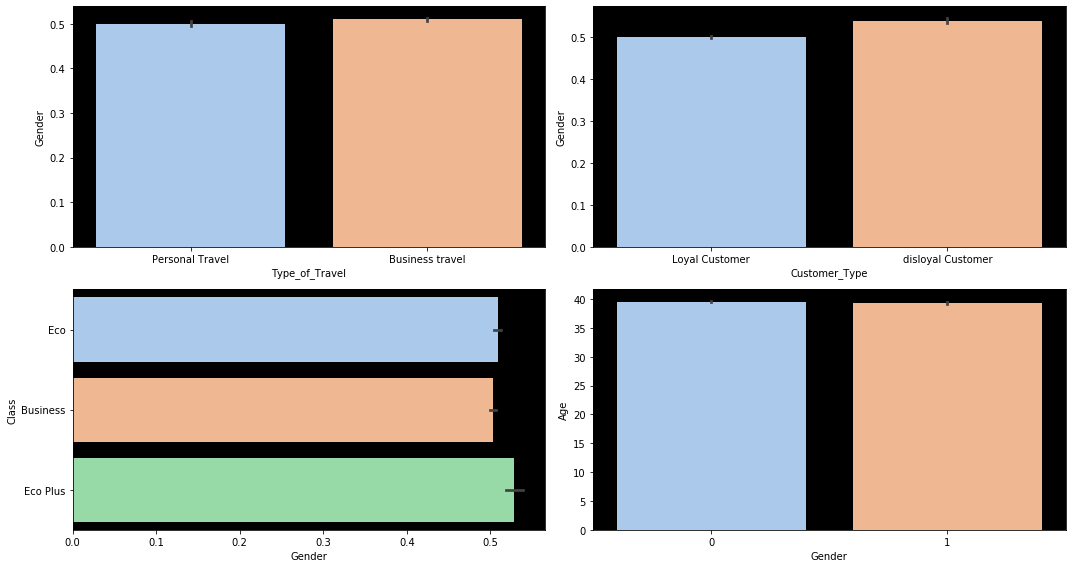

In [20]:
with sns.axes_style({'axes.facecolor':'black'}):
    with sns.color_palette('pastel'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Type_of_Travel,df.Gender)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.Customer_Type,df.Gender)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Gender,df.Class)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Gender,df.Age)
        plt.tight_layout()

        plt.show()

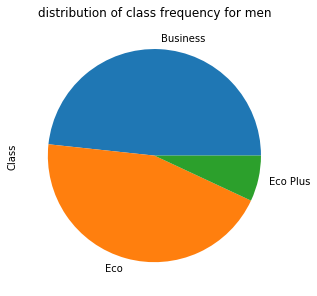

In [21]:
df[df.Gender==0].Class.value_counts().plot(kind='pie',figsize=(8,4))
plt.tight_layout()
plt.title("distribution of class frequency for men")
plt.show()

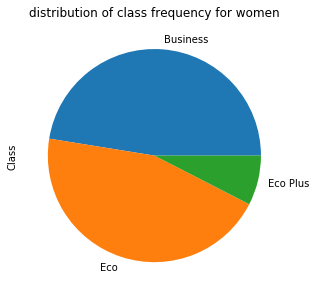

In [22]:
df[df.Gender==1].Class.value_counts().plot(kind='pie',figsize=(8,4))
plt.tight_layout()
plt.title("distribution of class frequency for women")
plt.show()

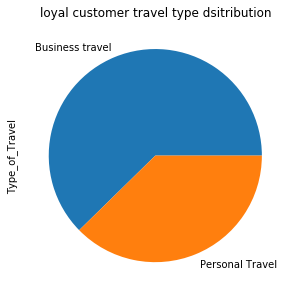

In [23]:
df[df.Customer_Type=='Loyal Customer'].Type_of_Travel.value_counts().plot(kind='pie',figsize=(8,4))
plt.tight_layout()
plt.title("loyal customer travel type dsitribution")
plt.show()

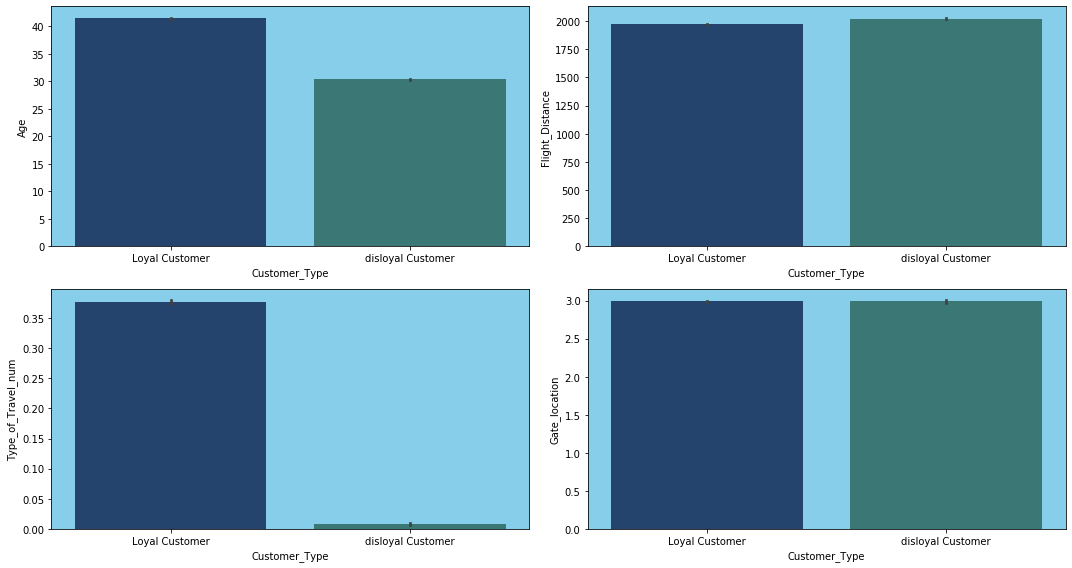

In [24]:
with sns.axes_style({'axes.facecolor':'skyblue'}):
    with sns.color_palette('gist_earth'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Customer_Type,df.Age)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.Customer_Type,df.Flight_Distance)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Customer_Type,df.Type_of_Travel_num)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Customer_Type,df.Gate_location)
        plt.tight_layout()

        plt.show()

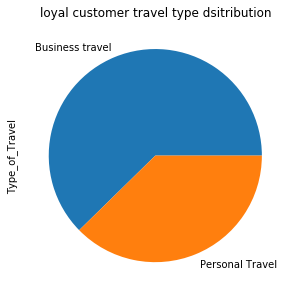

In [25]:
df[df.Customer_Type=='Loyal Customer'].Type_of_Travel.value_counts().plot(kind='pie',figsize=(8,4))
plt.tight_layout()
plt.title("loyal customer travel type dsitribution")
plt.show()

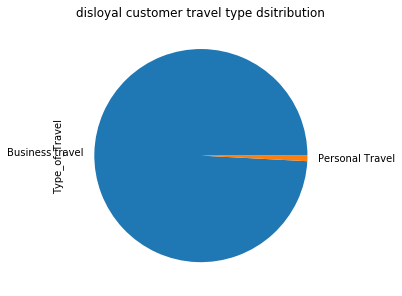

In [26]:
df[df.Customer_Type!='Loyal Customer'].Type_of_Travel.value_counts().plot(kind='pie',figsize=(8,4))
plt.tight_layout()
plt.title("disloyal customer travel type dsitribution")
plt.show()

3. Age - type of travel, class, flight distance, convenient


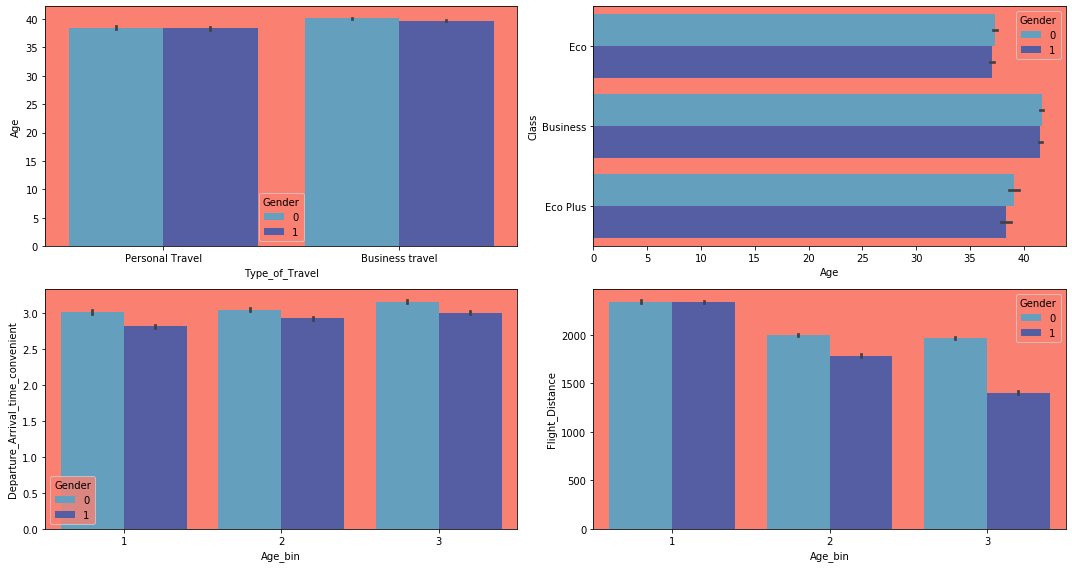

In [27]:
with sns.axes_style({'axes.facecolor':'salmon'}):
    with sns.color_palette('icefire'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Type_of_Travel,df.Age,hue=df.Gender)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.Age,df.Class,hue=df.Gender)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Age_bin,df.Departure_Arrival_time_convenient,hue=df.Gender)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Age_bin,df.Flight_Distance,hue=df.Gender)
        plt.tight_layout()

        plt.show()

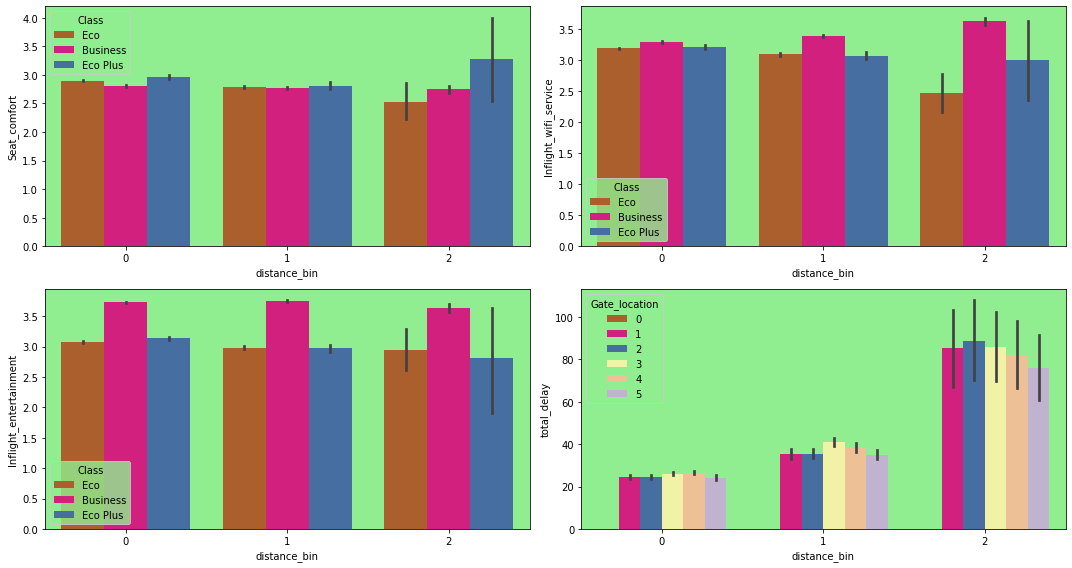

In [28]:
with sns.axes_style({'axes.facecolor':'lightgreen'}):
    with sns.color_palette('Accent_r'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.distance_bin,df.Seat_comfort,hue=df.Class)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.distance_bin,df.Inflight_wifi_service,hue=df.Class)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.distance_bin,df.Inflight_entertainment,hue=df.Class)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.distance_bin,df.total_delay,hue=df.Gate_location)
        plt.tight_layout()

        plt.show()

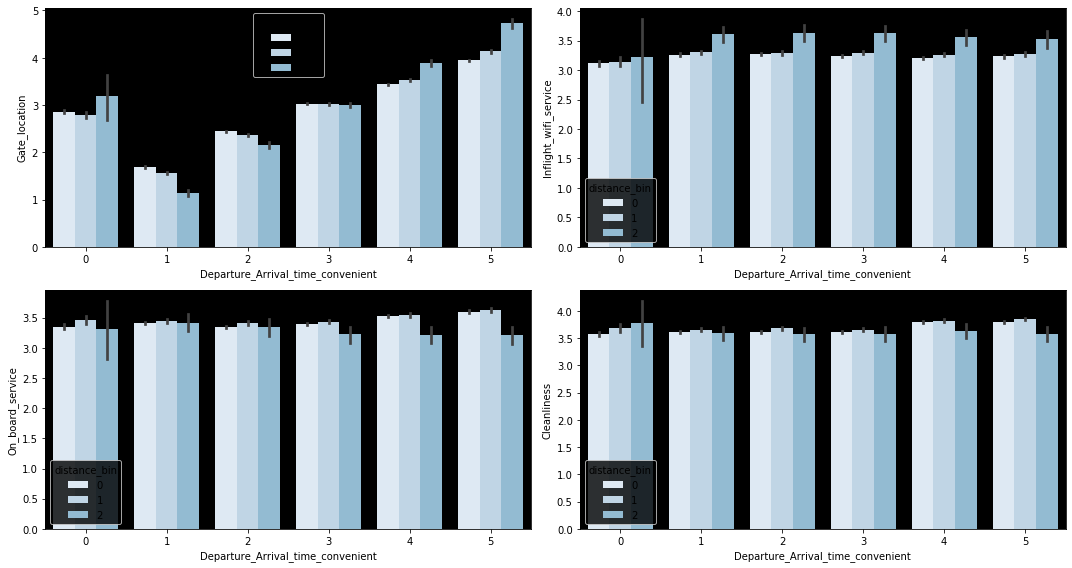

In [29]:
with sns.axes_style({'axes.facecolor':'black'}):
    with sns.color_palette('Blues'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Departure_Arrival_time_convenient,df.Gate_location,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.Departure_Arrival_time_convenient,df.Inflight_wifi_service,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Departure_Arrival_time_convenient,df.On_board_service,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Departure_Arrival_time_convenient,df.Cleanliness,hue=df.distance_bin)
        plt.tight_layout()

        plt.show()

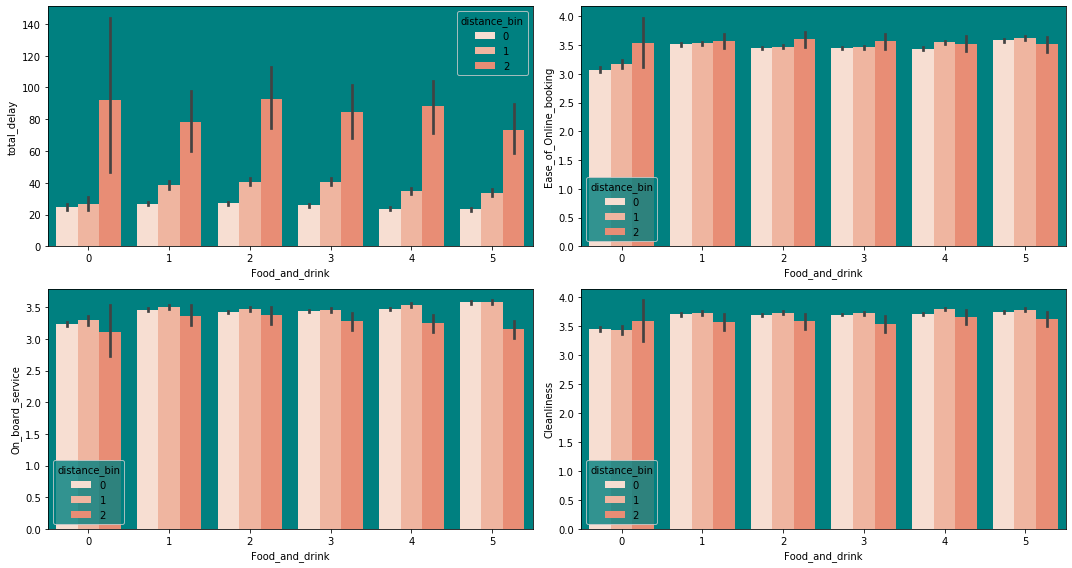

In [30]:
with sns.axes_style({'axes.facecolor':'teal'}):
    with sns.color_palette('Reds'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Food_and_drink,df.total_delay,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.barplot(df.Food_and_drink,df.Ease_of_Online_booking,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Food_and_drink,df.On_board_service,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Food_and_drink,df.Cleanliness,hue=df.distance_bin)
        plt.tight_layout()

        plt.show()

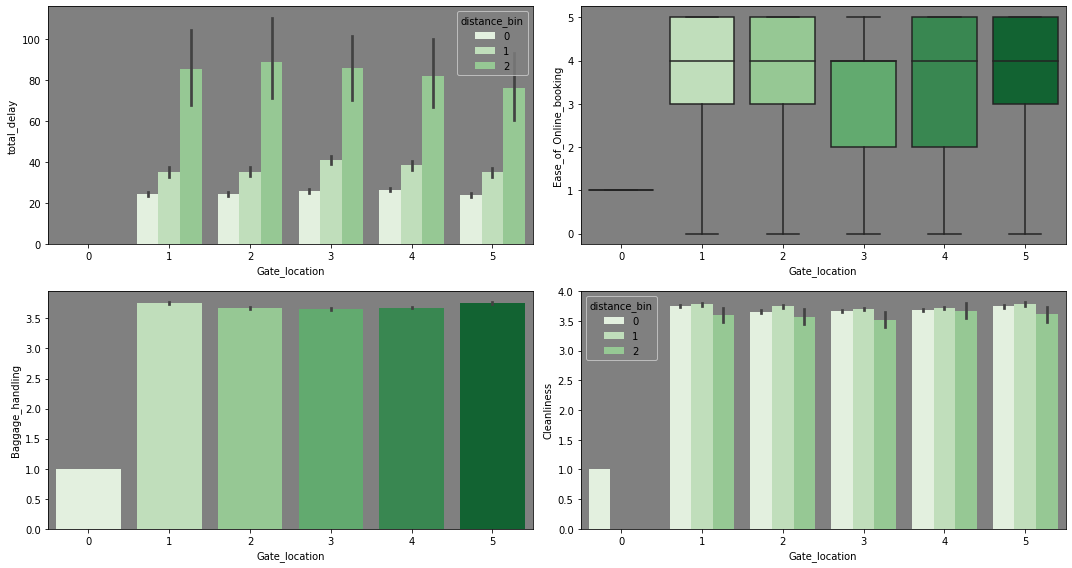

In [46]:
with sns.axes_style({'axes.facecolor':'grey'}):
    with sns.color_palette('Greens'):

        plt.figure(figsize=(15,8))

        plt.subplot(2,2,1)
        sns.barplot(df.Gate_location,df.total_delay,hue=df.distance_bin)
        plt.tight_layout()

        plt.subplot(2,2,2)
        sns.boxplot(df.Gate_location,df.Ease_of_Online_booking)
        plt.tight_layout()

        plt.subplot(2,2,3)
        sns.barplot(df.Gate_location,df.Baggage_handling)
        plt.tight_layout()

        plt.subplot(2,2,4)
        sns.barplot(df.Gate_location,df.Cleanliness,hue=df.distance_bin)
        plt.tight_layout()

        plt.show()

In [32]:
### LINEPLOTS?